In [1]:
%pip install numpy matplotlib scikit-learn tensorflow

  Using cached scikit_learn-1.7.1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp310-cp310-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp310-cp310-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB ? eta -:--:--
   --- -------

In [2]:
import zipfile
zip_path = 'Hindi-Dataset.zip'  
extract_to = 'Hindi-Dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete!")

Extraction complete!


In [3]:
import os

# Show folders/files after extracting
print("Contents of extracted folder:")
print(os.listdir('Hindi-Dataset'))

Contents of extracted folder:
['digits', 'Hindi', 'Top-10']


In [4]:
for folder in ['digits', 'Hindi', 'Top-10']:
    path = os.path.join('Hindi-Dataset', folder)
    print(f"\nContents of '{folder}':", os.listdir(path)[:5])  # show first 5 items


Contents of 'digits': ['digits']

Contents of 'Hindi': ['Test', 'Train']

Contents of 'Top-10': ['Test', 'Train']


In [5]:
import imghdr
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

data_dir = os.path.join('Hindi-Dataset', 'Hindi')
train_dir = os.path.join(data_dir, 'Train')
test_dir = os.path.join(data_dir, 'Test')
img_size = 32

X = []
y = []

class_names = sorted([folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))])

for idx, class_folder in enumerate(class_names):
    folder_path = os.path.join(train_dir, class_folder)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)

        # Skip if not a file or not an image
        if not os.path.isfile(img_path) or imghdr.what(img_path) is None:
            continue

        img = load_img(img_path, target_size=(img_size, img_size), color_mode='grayscale')
        img_array = img_to_array(img) / 255.0
        X.append(img_array)
        y.append(idx)

In [6]:
import numpy as np
from tensorflow.keras.utils import to_categorical

def load_dataset(data_dir):
    X = []
    y = []
    class_names = sorted(os.listdir(data_dir))

    for idx, class_folder in enumerate(class_names):
        folder_path = os.path.join(data_dir, class_folder)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)

            if not os.path.isfile(img_path) or imghdr.what(img_path) is None:
                continue

            img = load_img(img_path, target_size=(img_size, img_size), color_mode='grayscale')
            img_array = img_to_array(img) / 255.0
            X.append(img_array)
            y.append(idx)

    return np.array(X), to_categorical(y), class_names

In [7]:
import numpy as np

X_train, y_train, class_names = load_dataset(train_dir)
X_test, y_test, _ = load_dataset(test_dir)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Number of classes:", len(class_names))

Train shape: (78200, 32, 32, 1)
Test shape: (13800, 32, 32, 1)
Number of classes: 46


In [8]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [12]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
1100/1100 [==============================] - 5s 4ms/step - loss: 0.0142 - accuracy: 0.9951 - val_loss: 32.4998 - val_accuracy: 0.1128
Epoch 2/10
1100/1100 [==============================] - 4s 4ms/step - loss: 0.0170 - accuracy: 0.9943 - val_loss: 33.7189 - val_accuracy: 0.1146
Epoch 3/10
1100/1100 [==============================] - 4s 4ms/step - loss: 0.0136 - accuracy: 0.9953 - val_loss: 32.2330 - val_accuracy: 0.1240
Epoch 4/10
1100/1100 [==============================] - 4s 4ms/step - loss: 0.0103 - accuracy: 0.9963 - val_loss: 34.6247 - val_accuracy: 0.1137
Epoch 5/10
1100/1100 [==============================] - 4s 4ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 33.3702 - val_accuracy: 0.1141
Epoch 6/10
1100/1100 [==============================] - 5s 4ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 35.8794 - val_accuracy: 0.1179
Epoch 7/10
1100/1100 [==============================] - 4s 4ms/step - loss: 0.0104 - accuracy: 0.9964 - val_loss: 34.6532 - val_ac

In [13]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

432/432 [==============================] - 2s 3ms/step - loss: 3.6794 - accuracy: 0.8875
Test Accuracy: 0.8875


1/1 [==============================] - 0s 15ms/step


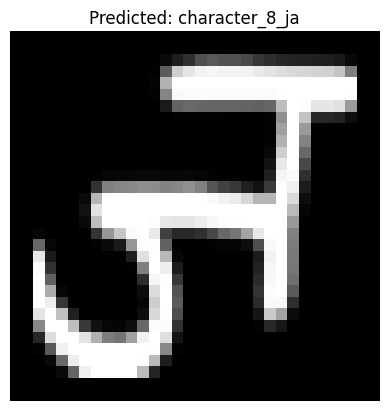

In [16]:
import random
import matplotlib.pyplot as plt
i = random.randint(0, len(X_test)-1)

plt.imshow(X_test[i].reshape(img_size, img_size), cmap='gray')
pred = model.predict(np.expand_dims(X_test[i], axis=0))
plt.title(f"Predicted: {class_names[np.argmax(pred)]}")
plt.axis('off')
plt.show()